# Data Cleaning Step
## Need to combine all datasets, and start data cleaning process. Steps listed below

- Check for missing data 

- Check for outliers and doubles 

- Change Price Column
    - Cut dollar sign
    - cut , in price
    
- Change Area Column 
    - Cut sqft from string and , 
    
- Bedrooms / Bathrooms 
    - cut beds and baths, change studio to 1 room 

- Parking 
    - change to yes/no 

- Convert All Numbers to Integers

- Make new column 'price/sqft' 

### Imports

In [156]:
import pandas as pd
import os
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

## Combining All Datasets

In [3]:
dfInd = pd.read_csv('Indianapolis_DataFinal.csv')
dfCol = pd.read_csv('ColoradoSprings_Data.csv')
dfAlb = pd.read_csv('Albuquerque_Data.csv')
dfPhil = pd.read_csv('Philadelphia_Data.csv')
dfSan = pd.read_csv('SanDiego_Data.csv')

In [4]:
dfcombined = pd.concat([dfInd, dfCol, dfAlb, dfPhil, dfSan], ignore_index=True, sort=False)

In [6]:
dfcombined.to_csv('CombinedData.csv', encoding='utf-8', index=False)

In [40]:
dfcombined = pd.read_csv('CombinedData.csv')

## Data Cleaning Process

In [41]:
dfcombined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     4940 non-null   object
 1   Bedrooms    4389 non-null   object
 2   Bathrooms   4293 non-null   object
 3   Area        4253 non-null   object
 4   Year Built  4319 non-null   object
 5   Parking     4940 non-null   object
 6   Price       4928 non-null   object
 7   Location    5208 non-null   object
dtypes: object(8)
memory usage: 325.6+ KB


### Getting rid of NA values

In [42]:
dfcombined[dfcombined.isna().any(axis=1)]
#checking for at least one missing value in row

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
8,8355 Fieldfare Way,NaN,NaN,NaN,NaN,No Info,"$40,000",Indianapolis
13,11805 E 62nd St,Studio,NaN,NaN,NaN,No Info,"$3,000,000",Indianapolis
20,41 N Euclid Ave,6 Beds,3 Baths,NaN,Year Built: 1920,No Info,"$199,900",Indianapolis
58,2937 W 10th St,5 Beds,5 Baths,NaN,Year Built: 1913,No Info,"$259,990",Indianapolis
59,7338 Five Points Rd,NaN,NaN,NaN,NaN,No Info,"$595,000",Indianapolis
...,...,...,...,...,...,...,...,...
5181,Vacant Lot Off Eldorado Dr,NaN,NaN,NaN,NaN,No Info,"$1,560,000",San Diego
5182,2500 6th Ave #4,4 Beds,5 Baths,"5,000 sqft",NaN,Garage,"$14,995,000",San Diego
5188,3971 32nd St,NaN,NaN,NaN,NaN,No Info,"$2,850,000",San Diego
5199,7570 La Jolla Blvd,NaN,NaN,NaN,NaN,No Info,"$6,390,000",San Diego


<AxesSubplot: >

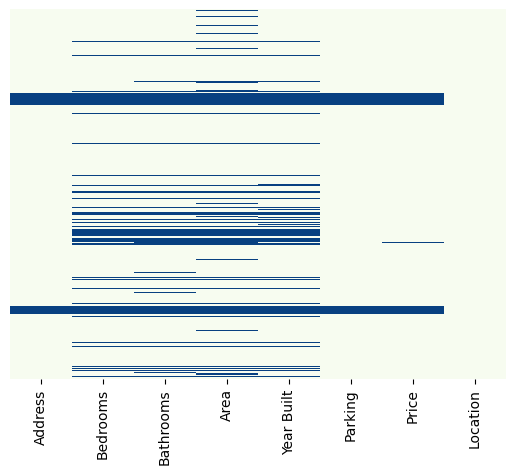

In [43]:
#making heatmap of missing values
sns.heatmap(dfcombined.isna(), yticklabels = False, cbar = False, cmap = 'GnBu')

In [44]:
#Dropping results with n/a values
dfcombined = dfcombined.dropna()

In [45]:
len(dfcombined)

4147

In [47]:
#Showing that all rows have non-null values
dfcombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 5207
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     4147 non-null   object
 1   Bedrooms    4147 non-null   object
 2   Bathrooms   4147 non-null   object
 3   Area        4147 non-null   object
 4   Year Built  4147 non-null   object
 5   Parking     4147 non-null   object
 6   Price       4147 non-null   object
 7   Location    4147 non-null   object
dtypes: object(8)
memory usage: 291.6+ KB


### Checking for duplicates

In [48]:
dfcombined = dfcombined.reset_index(drop=True)

In [49]:
dfcombined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,"$85,000",Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,"$159,900",Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,"$152,000",Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,"$180,000",Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,"$400,000+",Indianapolis
...,...,...,...,...,...,...,...,...
4142,8517 Even Seth Cir,4 Beds,3 Baths,"2,217 sqft",Year Built: 2018,3 Car Garage,"$1,199,000",San Diego
4143,13104 Dana Vista St #350,4 Beds,2 Baths,"1,980 sqft",Year Built: 2006,Carport,"$395,500",San Diego
4144,3906 Stanford Dr,4 Beds,3 Baths,"2,398 sqft",Year Built: 1992,3 Car Garage,"$975,000",San Diego
4145,3365 Donna Dr,3 Beds,3 Baths,"1,680 sqft",Year Built: 1976,2 Car Garage,"$1,495,000",San Diego


In [50]:
dfcombined.duplicated().sum()

537

In [51]:
#537 duplicated entries
dfcombined.loc[dfcombined.duplicated(), :]

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
536,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,"$85,000",Indianapolis
537,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,"$159,900",Indianapolis
538,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,"$152,000",Indianapolis
539,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,"$180,000",Indianapolis
540,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,"$400,000+",Indianapolis
...,...,...,...,...,...,...,...,...
1068,7131 Parkstay Ct,4 Beds,3 Baths,"2,053 sqft",Year Built: 2023,2 Car Garage,"$329,000",Indianapolis
1069,809 W Edgewood Ave,3 Beds,2 Baths,"1,767 sqft (on 0.55 acres)",Year Built: 1969,1 Car Garage,"$275,000",Indianapolis
1070,2245 Brookside Ave,3 Beds,1 Bath,"1,680 sqft",Year Built: 1907,No Info,"$125,000",Indianapolis
1071,3818 N Park Ave,3 Beds,2 Baths,"2,034 sqft",Year Built: 1905,Garage,"$269,000",Indianapolis


In [52]:
#remove duplicate entries 
dfcombined = dfcombined.drop_duplicates()

In [62]:
dfcombined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     3610 non-null   object
 1   Bedrooms    3610 non-null   object
 2   Bathrooms   3610 non-null   object
 3   Area        3610 non-null   object
 4   Year Built  3610 non-null   object
 5   Parking     3610 non-null   object
 6   Price($)    3610 non-null   object
 7   Location    3610 non-null   object
dtypes: object(8)
memory usage: 225.8+ KB


In [54]:
#fix index again
dfcombined = dfcombined.reset_index(drop=True)

### Removing extra elements from the columns
#### Remove dollar signs, remove commas from price, change price string to integer to make it database readable

In [57]:
dfcombined = dfcombined.rename(columns = {'Price':'Price($)'})

In [58]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,"$85,000",Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,"$159,900",Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,"$152,000",Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,"$180,000",Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,"$400,000+",Indianapolis


In [59]:
dfcombined['Price($)'] = dfcombined['Price($)'].str.strip('$')

In [61]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,"85,000",Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,"159,900",Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,"152,000",Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,"180,000",Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,"400,000+",Indianapolis


In [63]:
dfcombined['Price($)'] = dfcombined['Price($)'].str.replace(',', '')

In [64]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,400000+,Indianapolis


In [66]:
dfcombined['Price($)'] = dfcombined['Price($)'].str.strip('+')

In [67]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,400000,Indianapolis


### Changing other columns
#### deleting sqft from Area column and year built from year column, etc

In [68]:
dfcombined = dfcombined.rename(columns = {'Area':'Area(sqft)'})

In [69]:
dfcombined.to_csv('CombinedDataDuringClean.csv', encoding='utf-8', index=False)

In [120]:
dfcombined = pd.read_csv('CombinedDataDuringClean.csv')

In [121]:
#saved csv file for backup just in case I mess up the dataframe

dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].str.replace(' sqft', '')

In [122]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070",Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544",Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312",Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141",Year Built: 2023,No Info,400000,Indianapolis


In [123]:
dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].str.replace(',','')

In [124]:
dfcombined

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,1070,Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,1544,Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,1312,Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,2141,Year Built: 2023,No Info,400000,Indianapolis
...,...,...,...,...,...,...,...,...
3605,8517 Even Seth Cir,4 Beds,3 Baths,2217,Year Built: 2018,3 Car Garage,1199000,San Diego
3606,13104 Dana Vista St #350,4 Beds,2 Baths,1980,Year Built: 2006,Carport,395500,San Diego
3607,3906 Stanford Dr,4 Beds,3 Baths,2398,Year Built: 1992,3 Car Garage,975000,San Diego
3608,3365 Donna Dr,3 Beds,3 Baths,1680,Year Built: 1976,2 Car Garage,1495000,San Diego


Deleting anything after a space in the area column, to remove any extra info, like acerage included etc. Not needed in this column.

In [125]:
dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].str.replace("( ).*","")

C:\Users\cdmel\AppData\Local\Temp\ipykernel_19612\1764279034.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].str.replace("( ).*","")


In [127]:
dfcombined

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,1070,Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,1544,Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,1312,Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,2141,Year Built: 2023,No Info,400000,Indianapolis
...,...,...,...,...,...,...,...,...
3605,8517 Even Seth Cir,4 Beds,3 Baths,2217,Year Built: 2018,3 Car Garage,1199000,San Diego
3606,13104 Dana Vista St #350,4 Beds,2 Baths,1980,Year Built: 2006,Carport,395500,San Diego
3607,3906 Stanford Dr,4 Beds,3 Baths,2398,Year Built: 1992,3 Car Garage,975000,San Diego
3608,3365 Donna Dr,3 Beds,3 Baths,1680,Year Built: 1976,2 Car Garage,1495000,San Diego


### Bedrooms and Bathrooms column editing

In [128]:
dfcombined['Bedrooms'] = dfcombined['Bedrooms'].str.replace(' Beds','')

In [129]:
dfcombined['Bedrooms'] = dfcombined['Bedrooms'].str.replace(' Bed','')

In [130]:
dfcombined

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3,1 Bath,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2,2 Baths,1070,Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2,1 Bath,1544,Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2,2 Baths,1312,Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3,3 Baths,2141,Year Built: 2023,No Info,400000,Indianapolis
...,...,...,...,...,...,...,...,...
3605,8517 Even Seth Cir,4,3 Baths,2217,Year Built: 2018,3 Car Garage,1199000,San Diego
3606,13104 Dana Vista St #350,4,2 Baths,1980,Year Built: 2006,Carport,395500,San Diego
3607,3906 Stanford Dr,4,3 Baths,2398,Year Built: 1992,3 Car Garage,975000,San Diego
3608,3365 Donna Dr,3,3 Baths,1680,Year Built: 1976,2 Car Garage,1495000,San Diego


Check for studio in the bedrooms column, change to 0 rooms

In [131]:
#amount of rows in the bedrooms column with studio in the name
len(dfcombined.loc[dfcombined['Bedrooms'].isin(['Studio'])])

17

In [132]:
dfcombined['Bedrooms'].value_counts()

3         1448
4          839
2          621
5          397
6          134
1          104
7           20
8           17
Studio      17
10           6
9            3
14           2
49           1
11           1
Name: Bedrooms, dtype: int64

In [133]:
#I think I want to change studio to 0 bedroom
dfcombined['Bedrooms'] = dfcombined['Bedrooms'].apply(lambda x: 0 if 'Studio' in x else x)
#dfcombined['Bedrooms'] = dfcombined['Bedrooms'].str.replace('Studio','0')

In [134]:
dfcombined['Bedrooms'].value_counts()

3     1448
4      839
2      621
5      397
6      134
1      104
7       20
8       17
0       17
10       6
9        3
14       2
49       1
11       1
Name: Bedrooms, dtype: int64

As you can see the studio elements were changed to 0 bedrooms. 

In [135]:
dfcombined['Bathrooms'] = dfcombined['Bathrooms'].str.replace(' Bath','')

In [136]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3,1,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2,2s,1070,Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2,1,1544,Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2,2s,1312,Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3,3s,2141,Year Built: 2023,No Info,400000,Indianapolis


In [137]:
dfcombined['Bathrooms'] = dfcombined['Bathrooms'].str.replace('s','')

In [138]:
dfcombined

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3,1,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2,2,1070,Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2,1,1544,Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2,2,1312,Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3,3,2141,Year Built: 2023,No Info,400000,Indianapolis
...,...,...,...,...,...,...,...,...
3605,8517 Even Seth Cir,4,3,2217,Year Built: 2018,3 Car Garage,1199000,San Diego
3606,13104 Dana Vista St #350,4,2,1980,Year Built: 2006,Carport,395500,San Diego
3607,3906 Stanford Dr,4,3,2398,Year Built: 1992,3 Car Garage,975000,San Diego
3608,3365 Donna Dr,3,3,1680,Year Built: 1976,2 Car Garage,1495000,San Diego


### Save to csv for backup, edit Year Built column

In [139]:
dfcombined.to_csv('CombinedDataDuringClean.csv', encoding='utf-8', index=False)

In [142]:
dfcombined['Year Built'] = dfcombined['Year Built'].str.replace(":.*","")

C:\Users\cdmel\AppData\Local\Temp\ipykernel_19612\329812324.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfcombined['Year Built'] = dfcombined['Year Built'].str.replace(":.*","")


Found that there was also some columns with the year renovated included in the year built column, so I just deleted this information since there wasn't enough houses that included this information to keep it. 

In [148]:
dfcombined['Year Built'] = dfcombined['Year Built'].str.replace('Year Renovated', '')

In [149]:
dfcombined['Year Built'].value_counts()

2023    661
1925    180
1920    123
2022     75
1950     68
       ... 
1893      1
1891      1
1907      1
1853      1
1918      1
Name: Year Built, Length: 144, dtype: int64

In [150]:
dfcombined.to_csv('CombinedDataDuringClean.csv', encoding='utf-8', index=False)

### Change parking column to yes/no
Search for keywords to check if there is parking available and change to yes or no.

In [151]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3,1,864,1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2,2,1070,1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2,1,1544,1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2,2,1312,1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3,3,2141,2023,No Info,400000,Indianapolis


In [152]:
dfcombined['Parking'].value_counts()

2 Car Garage        988
Garage              752
No Info             503
Open Parking        416
3 Car Garage        339
1 Car Garage        305
None                 81
4 Car Garage         69
1 Carport Spaces     20
Carport              19
2 Open Spaces        17
2 Carport Spaces     16
1 Open Spaces        14
1 Parking Spaces     13
2 Parking Spaces      8
5 Car Garage          7
6 Car Garage          7
Parking Lot           3
2.5 Car Garage        3
3 Open Spaces         3
4 Open Spaces         3
6 Parking Spaces      3
8 Car Garage          3
Attached Garage       2
5 Open Spaces         2
5 Carport Spaces      1
7 Car Garage          1
4 Parking Spaces      1
5 Parking Spaces      1
4 Carport Spaces      1
3 Carport Spaces      1
15 Car Garage         1
20 Car Garage         1
3 Parking Spaces      1
8 Parking Spaces      1
28 Car Garage         1
17 Car Garage         1
6 Open Spaces         1
10 Open Spaces        1
Name: Parking, dtype: int64

In [153]:
# Garage, Parking, Car, Spaces = Yes 
# None or No = No

dfcombined['Parking'] = dfcombined['Parking'].apply(lambda x: 'yes' if 'Garage' in x or 
                                                    'Car' in x or 'Spaces' in x or 'Parking' in x 
                                                    or 'Carport' in x else 'no')


In [154]:
dfcombined['Parking'].value_counts()

yes    3026
no      584
Name: Parking, dtype: int64

In [155]:
dfcombined.to_csv('CombinedDataDuringClean.csv', encoding='utf-8', index=False)

### Changing all numbers to Integers
Bedrooms, Bathrooms, SQFT and Year Built

#### Bedrooms and bathrooms

In [158]:
#Checking if bedrooms entries are a string or a number 
is_numeric_dtype(dfcombined['Bedrooms'])

False

In [159]:
is_string_dtype(dfcombined['Bedrooms'])

True

In [161]:
#change bedrooms datatype to numeric
dfcombined['Bedrooms'] = dfcombined['Bedrooms'].astype(int)

In [163]:
is_numeric_dtype(dfcombined['Bedrooms'])

True

In [164]:
dfcombined['Bathrooms'] = dfcombined['Bathrooms'].astype(int)

#### next change area

In [173]:
is_numeric_dtype(dfcombined['Area(sqft)'])

False

In [174]:
dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].astype(int)

In [175]:
is_numeric_dtype(dfcombined['Area(sqft)'])

True

#### next change year built

In [176]:
is_numeric_dtype(dfcombined['Year Built'])

False

In [177]:
dfcombined['Year Built'] = dfcombined['Year Built'].astype(int)

In [178]:
is_numeric_dtype(dfcombined['Year Built'])

True

In [183]:
dfcombined['Year Built'].value_counts()

2023    661
1925    180
1920    123
2022     75
1950     68
       ... 
1893      1
1891      1
1907      1
1853      1
1918      1
Name: Year Built, Length: 144, dtype: int64

In [184]:
dfcombined.to_csv('CombinedDataDuringClean.csv', encoding='utf-8', index=False)

In [187]:
is_numeric_dtype(dfcombined['Price($)'])

True

### make new column price per sqft

In [188]:
dfcombined['Price/Sqft'] = dfcombined['Price($)']/dfcombined['Area(sqft)']

In [189]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,Price/Sqft
0,2926 Forest Manor Ave,3,1,864,1911,yes,85000,Indianapolis,98.379630
1,8820 Yardley Ct #208,2,2,1070,1993,no,159900,Indianapolis,149.439252
2,2169 Kildare Ave,2,1,1544,1940,yes,152000,Indianapolis,98.445596
3,4741 Bridgefield Dr,2,2,1312,1998,yes,180000,Indianapolis,137.195122
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3,3,2141,2023,no,400000,Indianapolis,186.828585


In [191]:
dfcombined['Price/Sqft'] = dfcombined['Price/Sqft'].round(2)

In [192]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,Price/Sqft
0,2926 Forest Manor Ave,3,1,864,1911,yes,85000,Indianapolis,98.38
1,8820 Yardley Ct #208,2,2,1070,1993,no,159900,Indianapolis,149.44
2,2169 Kildare Ave,2,1,1544,1940,yes,152000,Indianapolis,98.45
3,4741 Bridgefield Dr,2,2,1312,1998,yes,180000,Indianapolis,137.20
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3,3,2141,2023,no,400000,Indianapolis,186.83


### Checking for outliers in the data

In [193]:
dfcombined['Price/Sqft'].describe()

count    3610.000000
mean      372.819216
std       374.355695
min         4.950000
25%       172.602500
50%       226.625000
75%       384.440000
max      3703.700000
Name: Price/Sqft, dtype: float64

The house below is an apartment building for sale. It doesnt have any bedrooms listed even though it is 10,000 sqft. I think I will delete this outlier. 

In [194]:
dfcombined.loc[dfcombined['Price/Sqft'] < 10]

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,Price/Sqft
1832,300 San Mateo Blvd NE,0,1,101000,1979,no,500000,Albuquerque,4.95


In [197]:
dfcombined = dfcombined.drop(1832)

In [198]:
dfcombined.loc[dfcombined['Price/Sqft'] < 10]

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,Price/Sqft


The house below is fine. It is just a very large house and has a lot of bedrooms/sqft. The price per sqft was the same on Trulia. 

In [196]:
dfcombined.loc[dfcombined['Price/Sqft'] == 3703.700000]

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,Price/Sqft
3517,6308 Camino De La Costa,8,10,10260,1987,yes,38000000,San Diego,3703.7


In [199]:
dfcombined['Price/Sqft'].describe()

count    3609.000000
mean      372.921147
std       374.357463
min        17.090000
25%       172.640000
50%       226.690000
75%       384.620000
max      3703.700000
Name: Price/Sqft, dtype: float64

In [200]:
dfcombined['Bedrooms'].describe()

count    3609.000000
mean        3.404267
std         1.469684
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        49.000000
Name: Bedrooms, dtype: float64

In [201]:
dfcombined.loc[dfcombined['Bedrooms'] == 49]

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,Price/Sqft
2018,Address Not Disclosed,49,49,20314,1977,no,3250000,Albuquerque,159.99


It's kind of weird that the address is not disclosed and there is 49 bed/baths. So I think I will also drop this index.

In [202]:
dfcombined = dfcombined.drop(2018)

In [203]:
dfcombined['Bedrooms'].describe()

count    3608.000000
mean        3.391630
std         1.258586
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        14.000000
Name: Bedrooms, dtype: float64

In [204]:
dfcombined.loc[dfcombined['Bedrooms'] == 14]

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,Price/Sqft
2666,2327 N Park Ave,14,18,3720,2011,yes,469900,Philadelphia,126.32
3543,4140 48th St,14,8,4120,2022,yes,2095000,San Diego,508.50


These two are both apartment buildings and have more information so I will leave them.

In [205]:
dfcombined['Bathrooms'].describe()

count    3608.000000
mean        2.710643
std         1.315274
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        21.000000
Name: Bathrooms, dtype: float64

In [207]:
dfcombined.loc[dfcombined['Bathrooms'] == 21]

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,Price/Sqft
2992,2036-2036 N Highland Ave #2040,6,21,2601,2023,yes,1499900,San Diego,576.66


In [209]:
dfcombined['Area(sqft)'].describe()

count     3608.000000
mean      2223.975610
std       1308.644328
min        300.000000
25%       1333.750000
50%       1906.000000
75%       2811.250000
max      15420.000000
Name: Area(sqft), dtype: float64

In [210]:
dfcombined.to_csv('CombinedDataDuringClean.csv', encoding='utf-8', index=False)

In [211]:
dfcombined.to_csv('DataCleaned.csv', encoding='utf-8', index=False)